This project was done looking at a video: https://www.youtube.com/watch?v=jztwpsIzEGc&t=4169s 
This was my first attempt doing CNN Image Classifier. Therefore I would like to thank Mr Nicholas for the interesting video


# Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\v_vis\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\v_vis\\AppData\\Local\\Temp\\pip-install-7dd16o8d\\tensorflow-gpu_5f81d048504441dcb0bc3ec80f76e4cf\\setup.py'"'"'; __file__='"'"'C:\\Users\\v_vis\\AppData\\Local\\Temp\\pip-install-7dd16o8d\\tensorflow-gpu_5f81d048504441dcb0bc3ec80f76e4cf\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\v_vis\AppData\Local\Temp\pip-wheel-mt_zjrwl'
       cwd: C:\Users\v_vis\AppData\Local\Temp\pip-install-7dd16o8d\tensorflow-gpu_5f81d048504441dcb0bc3ec80f76e4cf\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us


  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyascii                      0.3.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [3]:
import tensorflow as tf
import os

mkl-fft                       1.3.1
mkl-random                    1.2.2
mkl-service                   2.4.0
mock                          4.0.3
mpmath                        1.2.1
msgpack                       1.0.2
multidict                     5.1.0
multipledispatch              0.6.0
munkres                       1.1.4
mypy-extensions               0.4.3
navigator-updater             0.2.1
nbclassic                     0.3.5
nbclient                      0.5.13
nbconvert                     6.4.4
nbformat                      5.3.0
nest-asyncio                  1.5.5
networkx                      2.7.1
nltk                          3.7
nose                          1.3.7
notebook                      6.4.8
numba                         0.55.1
numexpr                       2.8.1
numpy                         1.24.3
numpydoc                      1.2
oauthlib                      3.2.2
olefile                       0.46
opencv-python                 4.6.0.66
openpyxl                   

C:\Users\v_vis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# Remove Corrupt Images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

# Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

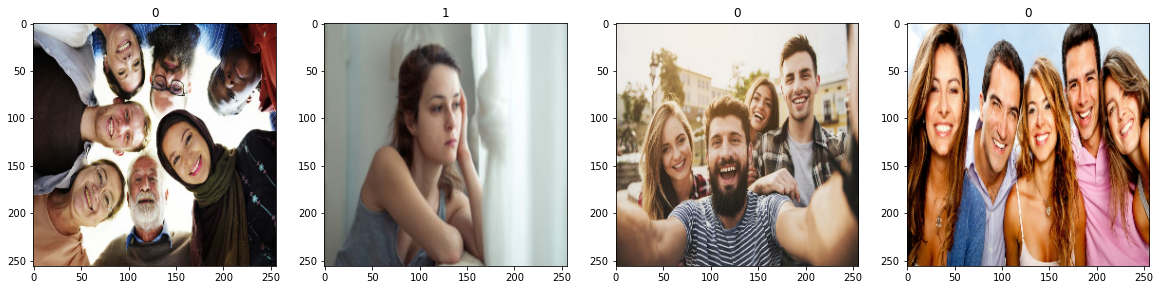

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[9.76470590e-01, 9.84313726e-01, 9.80392158e-01],
          [9.78155613e-01, 9.85661745e-01, 9.82077181e-01],
          [9.85814929e-01, 9.91789222e-01, 9.89736497e-01],
          ...,
          [8.23529422e-01, 8.31372559e-01, 8.27450991e-01],
          [8.23529422e-01, 8.31372559e-01, 8.27450991e-01],
          [8.23529422e-01, 8.31372559e-01, 8.27450991e-01]],
 
         [[9.77144599e-01, 9.84987736e-01, 9.81066167e-01],
          [9.78771746e-01, 9.86277878e-01, 9.82693315e-01],
          [9.86167729e-01, 9.92142022e-01, 9.90089297e-01],
          ...,
          [8.22534204e-01, 8.30377340e-01, 8.26455772e-01],
          [8.22797477e-01, 8.30640614e-01, 8.26719046e-01],
          [8.22855413e-01, 8.30698550e-01, 8.26776981e-01]],
 
         [[9.80208337e-01, 9.88051474e-01, 9.84129906e-01],
          [9.81572151e-01, 9.89078283e-01, 9.85493720e-01],
          [9.87771451e-01, 9.93745685e-01, 9.91693020e-01],
          ...,
          [8.18010390e-01, 8.25853527e-01, 8.2193

# Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Training

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 1.0548 - accuracy: 0.5491 - val_loss: 0.6715 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 13s 1s/step - loss: 0.6625 - accuracy: 0.6607 - val_loss: 0.6521 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 12s 1s/step - loss: 0.6422 - accuracy: 0.7277 - val_loss: 0.6014 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 13s 1s/step - loss: 0.5615 - accuracy: 0.7500 - val_loss: 0.4798 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 12s 1s/step - loss: 0.5366 - accuracy: 0.7589 - val_loss: 0.6022 - val_accuracy: 0.6406
Epoch 6/20
7/7 [==============================] - 12s 1s/step - loss: 0.5281 - accuracy: 0.7634 - val_loss: 0.4967 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 13s 1s/step - loss: 0.4710 - accuracy: 0.7768 - val_loss: 0.3725 - val_accuracy: 0.8281
Epoch 8/20
7/7 [==================

We would like to see the accuracy go up and the loss go down steadly

# Performance

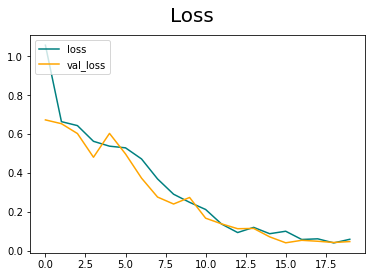

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

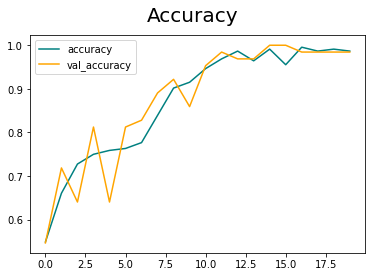

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

If both the accracy and val accuracy are at a constant 1.0. It shows that we have 100% accuracy

# Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
len(test)

1

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 348ms/step


In [36]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{ acc.result().numpy()})

Precision:1.0, Recall:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


# Test

In [37]:
import cv2

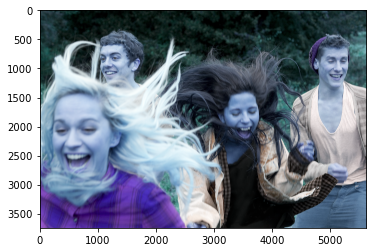

In [38]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

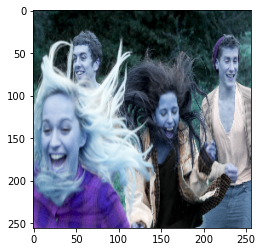

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 66ms/step


In [41]:
yhat

array([[0.14604299]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
